In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
from matplotlib import cm
from scipy.stats import multivariate_normal

## Распределение модели

In [2]:
def ackley(x):
    arg1 = np.sqrt((x[0] ** 2 + x[1] ** 2) / 50)
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return 20 * np.exp(-arg1) + np.exp(arg2) - np.e

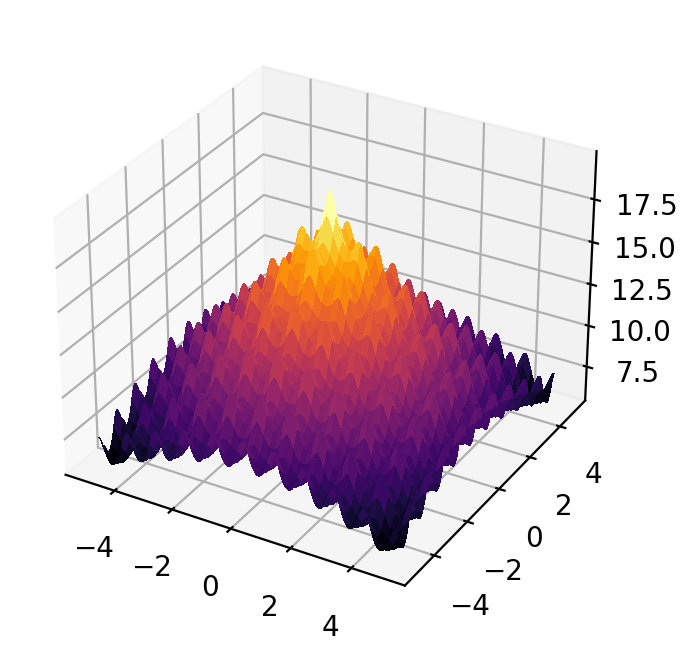

In [170]:
X = np.meshgrid(np.linspace(-5., 5., num=1000),np.linspace(-5., 5.,num=1000))
Z = ackley(X)
fig = plt.figure(dpi = 200)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X[0], X[1], Z, cmap=cm.inferno,
                       linewidth=0, antialiased=False)
plt.show()

## Вспомогательное распределение

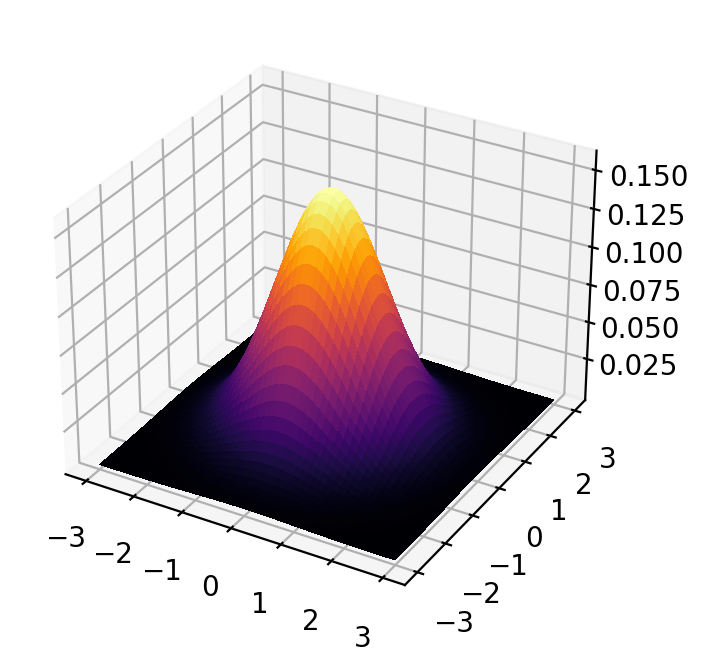

In [25]:
X, Y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(X.shape + (2,))

pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([0, 0], [[1., 0.], [0., 1.]]) # ([Mx, My], [cov])

fig = plt.figure(dpi = 200)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, rv.pdf(pos), cmap=cm.inferno,
                       linewidth=0, antialiased=False)
plt.show()

## Реализация алгоритма

In [34]:
Q = multivariate_normal([0,0],[[0.1,0],[0,0.1]])
x_t = [0,0]
samples = [x_t]
for i in range(1000):
    x_random = Q.rvs() + x_t
    a = ackley(x_random) / ackley(x_t)
    if a >= 1 or x_t[0] == random.choices([x_random[0], x_t[0]], weights=[a, 1 - a])[0]:
        x_t = x_random
        samples.append(x_t)

## Визуализация

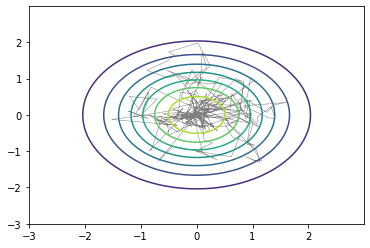

In [35]:
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z = multivariate_normal([0, 0], [[1., 0.], [0., 1.]]) # ([Mx, My], [cov])

codes = np.ones(len(samples), int) * path.Path.LINETO
codes[0] = path.Path.MOVETO

p = path.Path(samples,codes)

fig, ax = plt.subplots()
ax.contour(X, Y, Z.pdf(pos))
ax.add_patch(patches.PathPatch(p, facecolor='none', lw=0.5, edgecolor='gray'))
plt.show()